In [1]:
import pandas  as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/adult.csv')

In [3]:
df.shape

(32561, 15)

In [4]:
df.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
6753,40,Private,220460,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Canada,<=50K
31000,17,?,219277,11th,7,Never-married,?,Own-child,White,Female,0,0,20,United-States,<=50K
9701,18,Private,302859,HS-grad,9,Never-married,Sales,Own-child,White,Male,0,0,20,United-States,<=50K
11471,47,Private,197702,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
19032,37,Private,136028,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
df['marital.status'].unique()

<StringArray>
[              'Widowed',              'Divorced',             'Separated',
         'Never-married',    'Married-civ-spouse', 'Married-spouse-absent',
     'Married-AF-spouse']
Length: 7, dtype: str

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  str  
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  str  
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  str  
 6   occupation      32561 non-null  str  
 7   relationship    32561 non-null  str  
 8   race            32561 non-null  str  
 9   sex             32561 non-null  str  
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  str  
 14  income          32561 non-null  str  
dtypes: int64(6), str(9)
memory usage: 3.7 MB


In [9]:
df['income'].unique()

<StringArray>
['<=50K', '>50K']
Length: 2, dtype: str

### label the target values

In [10]:
df['income']=[1 if i=='>50K' else 0 for i in df['income']]

In [11]:
# Remove the not mentioned values

df=df[df['occupation'].values!='?']

In [12]:
df['income'].value_counts()

income
0    23068
1     7650
Name: count, dtype: int64

In [13]:
#under sampling due to high  imbalance data

majority_data=df[df.income==0]
minority_data=df[df.income==1]
majority_data=majority_data.sample(n=8000,random_state=42)
balanced_data=pd.concat([majority_data,minority_data])

In [14]:
#define numerical and categorical 

categorical_features=[]
numerical_features=[]
for col in balanced_data.columns:
    if balanced_data[col].dtype=='str':
        categorical_features.append(col)
    else:
        numerical_features.append(col)    


In [15]:
print(f'the numric features are:{numerical_features}')
print(f'categoric features are :{categorical_features}')

the numric features are:['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']
categoric features are :['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


In [16]:
numerical_features_data=pd.DataFrame()
for col in numerical_features:
    numerical_features_data[col]=balanced_data[col]


In [17]:
numerical_features_data

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
20202,25,123586,10,0,0,40,0
8138,20,182200,9,0,0,30,0
3946,35,183898,9,2354,0,40,0
324,36,297847,9,0,2001,40,0
28616,19,276973,10,0,0,20,0
...,...,...,...,...,...,...,...
32536,54,337992,13,0,0,50,1
32539,34,160216,13,0,0,55,1
32547,39,111499,12,0,0,20,1
32555,53,321865,14,0,0,40,1


<Axes: >

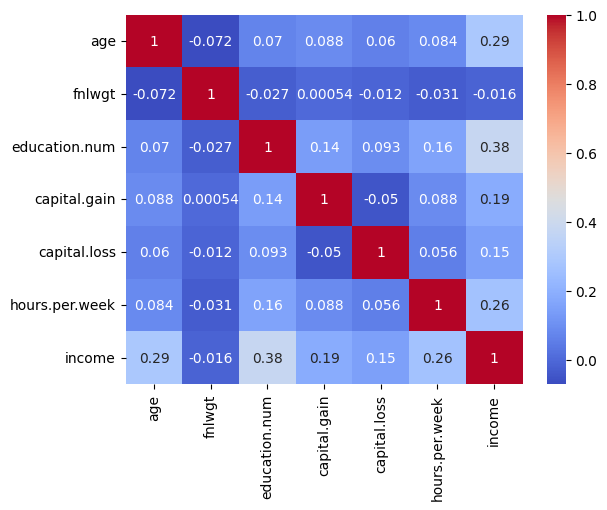

In [18]:
sns.heatmap(numerical_features_data.corr(),annot=True,cmap='coolwarm')

In [19]:

numerical_features_data.drop(columns=['fnlwgt'],inplace=True)

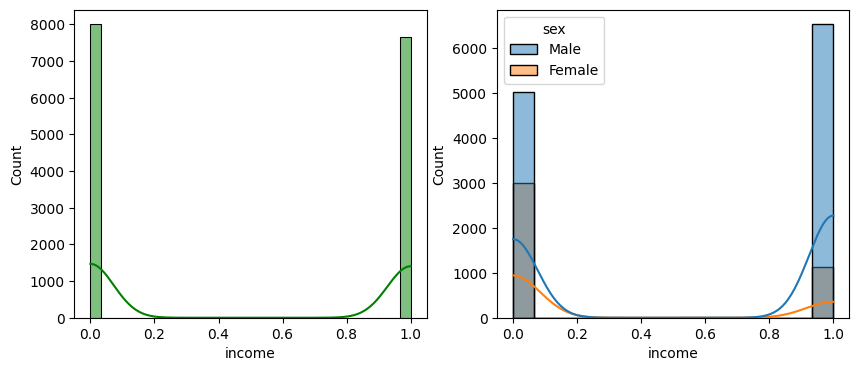

In [20]:
fig,axs=plt.subplots(1,2,figsize=(10,4))
plt.subplot(121)
sns.histplot(data=balanced_data,x='income',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=balanced_data,x='income',kde=True,hue='sex')
plt.show()